In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils
from scipy.optimize import curve_fit
import importlib
#importlib.reload(utils)

In [6]:
# Import data

krypton_file_path_1 = f'Data/Kr-1.txt'
krypton_file_path_2 = f'Data/Kr-2.txt'
krypton_file_path_3 = f'Data/Kr-3.txt'
krypton_file_path_4 = f'Data/Kr-4.txt'  
krypton_file_path_5 = f'Data/Kr-5.txt'
krypton_file_path_6 = f'Data/Kr-6.txt'
krypton_file_path_7 = f'Data/Kr-7.txt'
krypton_file_path_8 = f'Data/Kr-8.txt'
krypton_file_path_9 = f'Data/Kr-9.txt'
krypton_file_path_10 = f'Data/Kr-10.txt'

file_paths = [
    krypton_file_path_1,
    krypton_file_path_2,
    krypton_file_path_3,
    krypton_file_path_4,
    krypton_file_path_5,
    krypton_file_path_6,
    krypton_file_path_7,
    krypton_file_path_8,
    krypton_file_path_9,
    krypton_file_path_10
]

data_dict = {}
for file_path in file_paths:
    data = pd.read_csv(file_path, header=None, skiprows=22)
    data_dict[file_path] = data


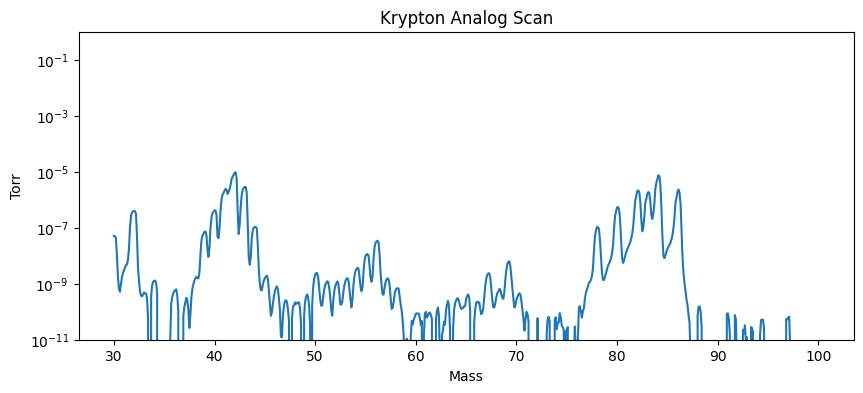

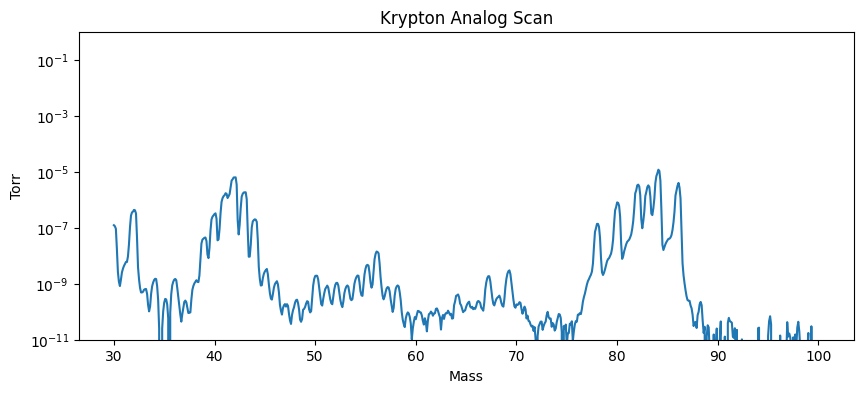

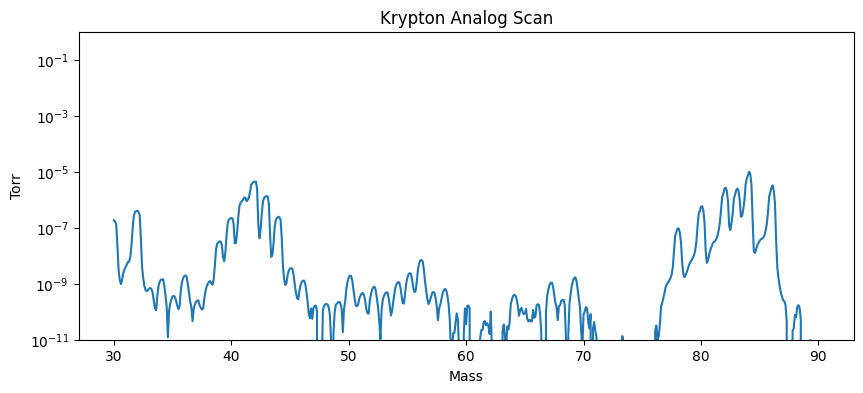

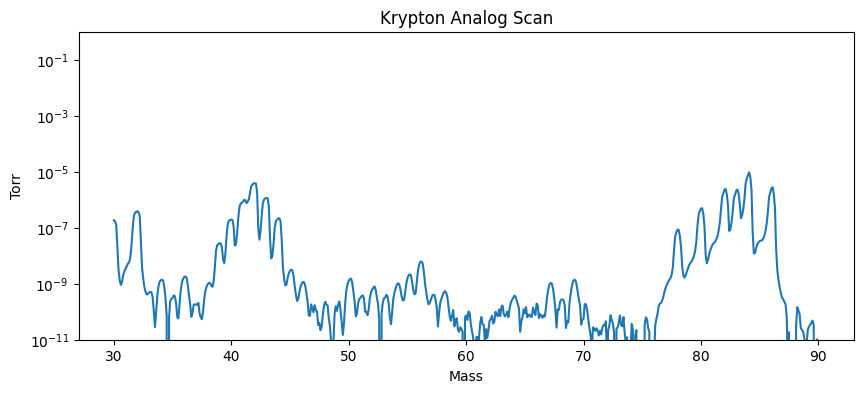

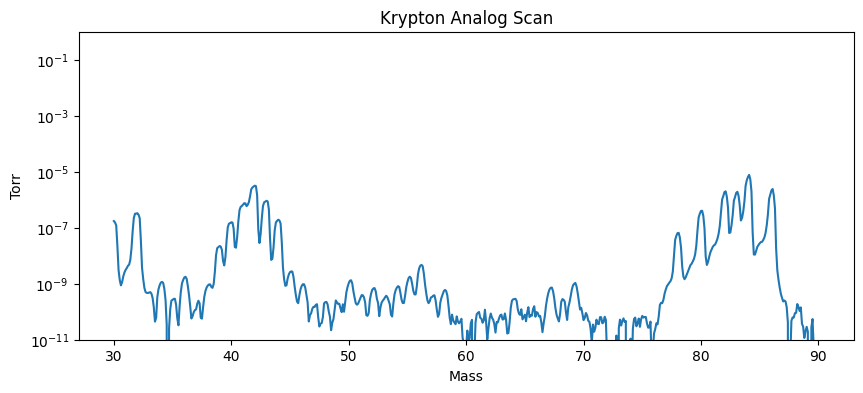

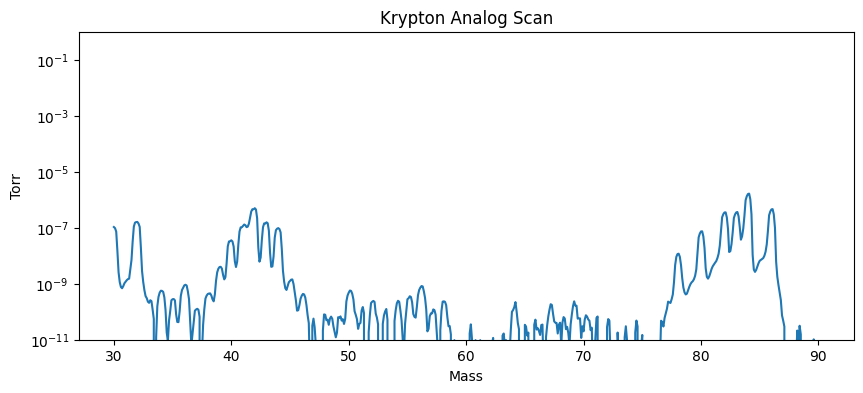

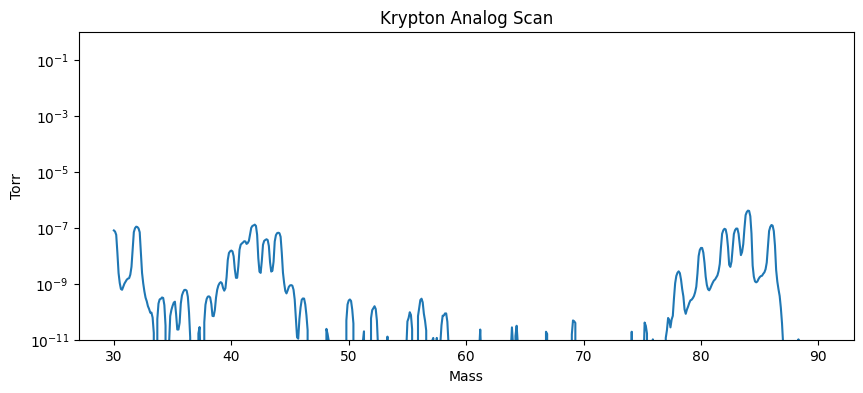

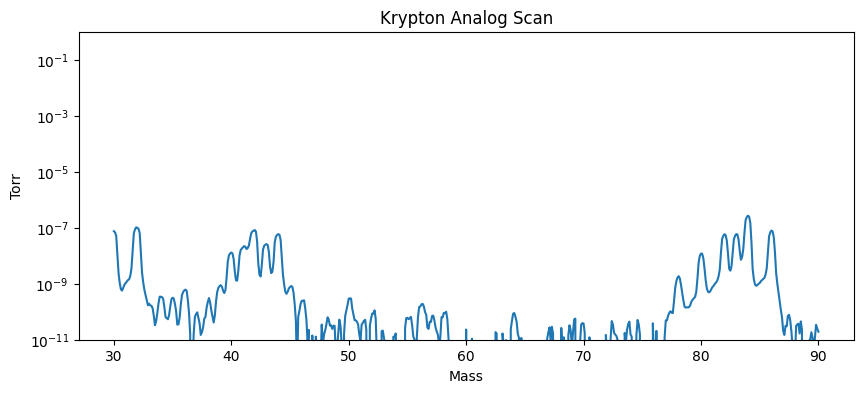

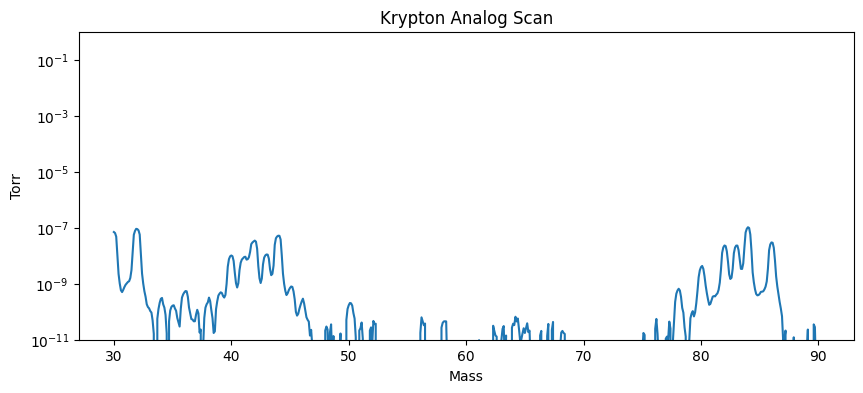

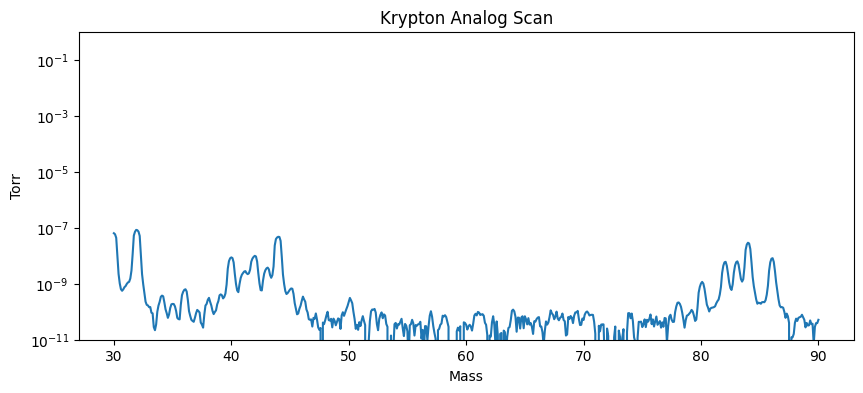

In [21]:
for key, data in data_dict.items():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_ylim(bottom=1e-11)
    ax.set_yscale('log')
    ax.plot(data[0], data[1])
    ax.set(xlabel='Mass', ylabel='Torr', title='Krypton Analog Scan')
    plt.show()
    

In [20]:
for key, data in data_dict.items():
    intensity = data[1] / data[1].max()*100
    data_dict[key]['Intensity'] = intensity


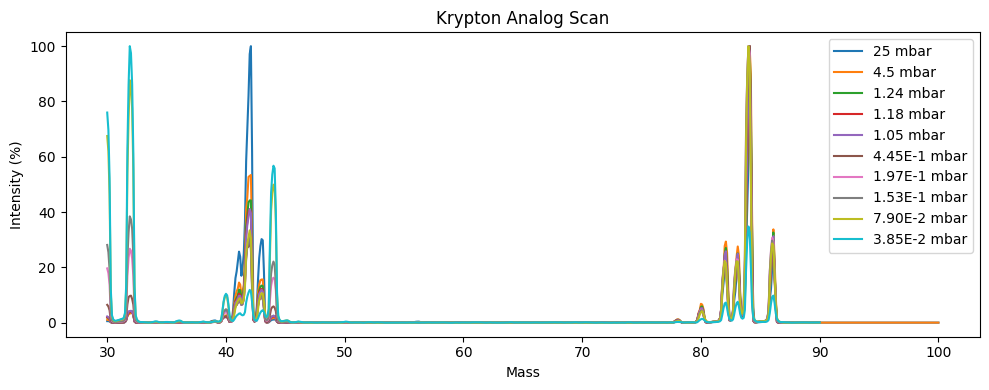

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))
legend_labels = [
    '25 mbar', '4.5 mbar', '1.24 mbar', '1.18 mbar', '1.05 mbar', 
    '4.45E-1 mbar', '1.97E-1 mbar', '1.53E-1 mbar', '7.90E-2 mbar', '3.85E-2 mbar'
]

for key, data in data_dict.items():
    ax.plot(data[0], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
plt.tight_layout()
plt.legend(legend_labels, loc='upper right')
plt.show()

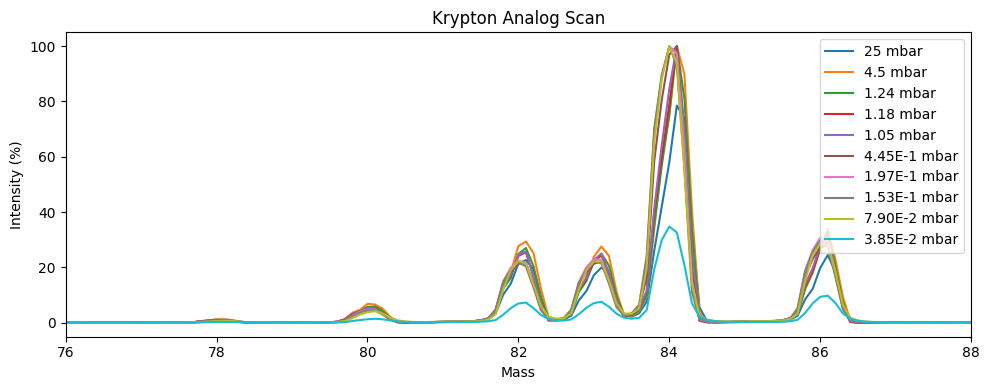

In [31]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(76, 88)
for key, data in data_dict.items():
    ax.plot(data[0], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
plt.tight_layout()
plt.legend(legend_labels, loc='upper right')
plt.show()

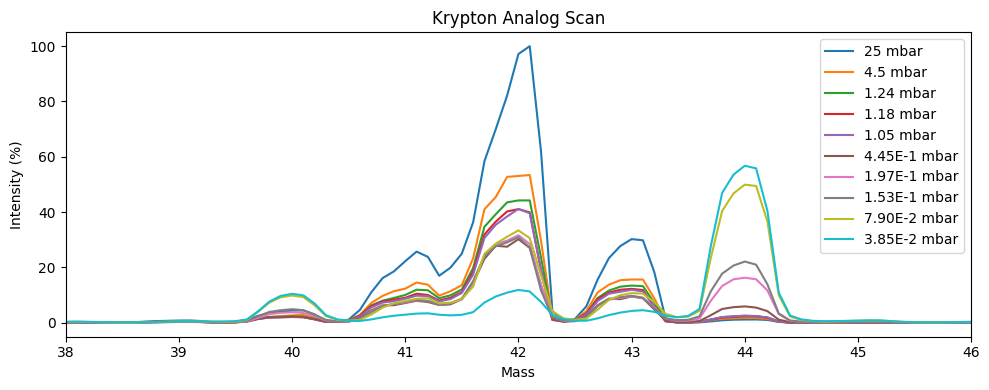

In [32]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(38, 46)
for key, data in data_dict.items():
    ax.plot(data[0], data['Intensity'])
    ax.set(xlabel='Mass', ylabel='Intensity (%)', title='Krypton Analog Scan')
plt.tight_layout()
plt.legend(legend_labels, loc='upper right')
plt.show()